# Whole Rock calculations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chemMap as cm
import pickle

In [2]:
with open('GalapGabbrosQuantData.pkl', 'rb') as f:
    Quant = pickle.load(f)

In [3]:
# randomly sample a region, at least 50% of total sample to calculate whole-rock composition from.
WR_error = {}
for s in ['03b', '04b']:
    WR_error[s] = cm.wholerock(Quant[s], list(Quant[s].keys())[:-3], X = 0.5, iterations = 200)

In [5]:
# anhydrous normalization of results
for s in ['03b', '04b']:
    for i in range(len(WR_error[s]['SiO2'])):
        WR_error[s].loc[i,:] = 100*WR_error[s].loc[i,:]/WR_error[s].loc[i,:].sum()

In [6]:
# calculate whole-rock for each sample using all available pixels that are not classified as nans
WholeRock = pd.DataFrame(index = list(Quant.keys()), 
                         columns = list(Quant['03b'].keys())[:-3], data = np.zeros((5, len(list(Quant['03b'].keys())[:-3]))))
for s in Quant:
    WholeRock.loc[s,:] = cm.wholerock(Quant[s], list(Quant[s].keys())[:-3]).loc[0]
    WholeRock.loc[s,:] = 100*WholeRock.loc[s,:]/WholeRock.loc[s,:].sum()

with open('GalapWholeRock.pkl', 'wb') as f:
    pickle.dump(WholeRock,f)

In [7]:
# load the Lyons et al. (2007) data for comparison.
Lyons = pd.read_excel('PubData/LyonsWholeRock.xlsx')
Lyons.loc[:,['Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'MnO', 'FeO']] = 100*Lyons.loc[:,['Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'MnO', 'FeO']].values/Lyons.loc[:,'Total'].values.reshape(5,1)
Lyons

,Sample,Set,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Cr2O3,MnO,FeO,Total
0,FLX511,Lyons,0.745379,21.546412,11.111111,45.279269,0.119261,10.435301,0.347843,NaN,0.167959,9.610415,100.62
1,FLX513,Lyons,1.773506,9.244031,19.052809,48.370158,0.059447,16.615476,0.346775,NaN,0.074309,3.527197,100.93
2,FLX516,Lyons,1.493718,10.693441,17.261846,48.590365,0.059353,15.738451,0.407558,NaN,0.091008,4.570185,101.09
3,FLX556,Lyons,2.716049,5.748148,22.834568,48.316049,0.118519,15.308642,0.417778,NaN,0.063210,3.219753,101.25
4,FLX559,Lyons,0.640384,14.958975,12.277366,45.887533,0.030018,18.160897,0.857515,NaN,0.150090,7.074245,99.94


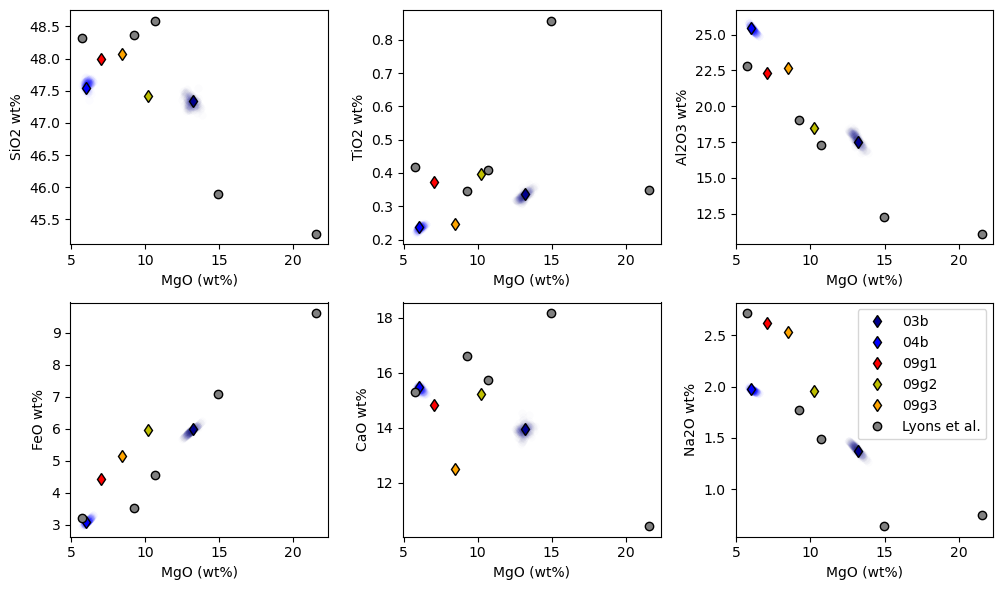

In [8]:
oxides = [['SiO2', 'TiO2', 'Al2O3'],['FeO', 'CaO', 'Na2O']]
color = {'03b': (0,0,0.56), '04b': 'b', '09g1': 'r', '09g2': 'y', '09g3': 'orange'}
f, a = plt.subplots(2,3, figsize = (10,6))
for i in range(2):
    for j in range(3):
        a[i][j].set_xlabel('MgO (wt%)')
        a[i][j].set_ylabel(oxides[i][j] + ' wt%')
        for s in color:
            if s in WR_error.keys():
                a[i][j].plot(WR_error[s]['MgO'], 
                             WR_error[s][oxides[i][j]], 'o', mec = 'none', 
                             mfc = color[s], alpha = 0.01, zorder = 0)
            
            a[i][j].plot(WholeRock.loc[s, 'MgO'],
                         WholeRock.loc[s, oxides[i][j]],
                         'dk', mfc = color[s], zorder = 1, label = s)
            
        a[i][j].plot(Lyons['MgO'], Lyons[oxides[i][j]], 'ok', mfc = (0.5,0.5,0.5), label = "Lyons et al.")
                
a[i][j].legend()
f.tight_layout()